In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("train.csv")

In [18]:
data.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  11-01-2016 17:00          60      30  19.89  47.596667  19.2  44.790000   
1  11-01-2016 17:10          60      30  19.89  46.693333  19.2  44.722500   
2  11-01-2016 17:20          50      30  19.89  46.300000  19.2  44.626667   
3  11-01-2016 17:30          50      40  19.89  46.066667  19.2  44.590000   
4  11-01-2016 17:40          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9  T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53   6.60        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56   6.48        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50   6.37        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40   6.25        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40   6.13        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410390  45.410390  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
data.drop('date', axis =1, inplace = True)
print(str(data.shape))

(19735, 28)


#### 2. Análisis de Datos para toma de decisiones en FE Pipeline

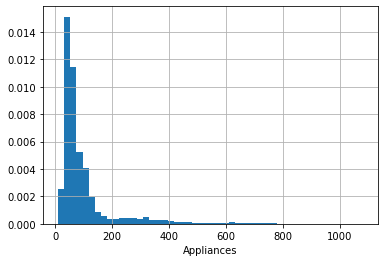

In [20]:
data['Appliances'].hist(bins = 50, density = True)
plt.xlabel('Appliances')
plt.show()

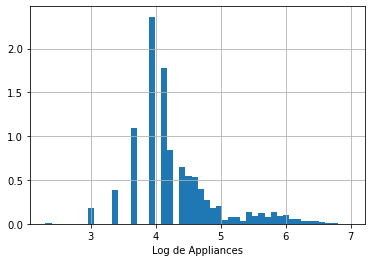

In [21]:
np.log(data['Appliances']).hist(bins = 50, density = True)
plt.xlabel('Log de Appliances')
plt.show()

In [22]:
#Variables numericas
num_vars = [var for var in data.columns ]

In [23]:
num_vars

['date',
 'Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

In [24]:
var_with_na = [var for var in data.columns if (data[var].isnull().sum() > 0)] #is null mapea True o False, y por eso se suma
len(var_with_na)

0

In [25]:
year_vars = [var for var in num_vars if (('date' in var ))]
year_vars

['date']

<AxesSubplot:xlabel='date'>

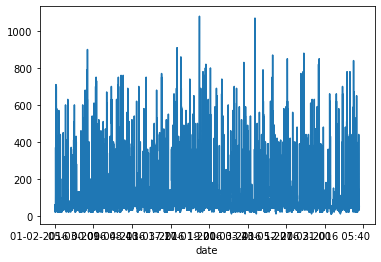

In [26]:
data.groupby('date')['Appliances'].median().plot() 

### Variables discretas

In [27]:
discrete_vars = [var for var in num_vars if ((len(data[var].unique()) < 20) and (var not in year_vars)) ]
discrete_vars

['lights']

In [28]:
data[discrete_vars].head()

lights
0      30
1      30
2      30
3      40
4      40

In [29]:
import seaborn as sns

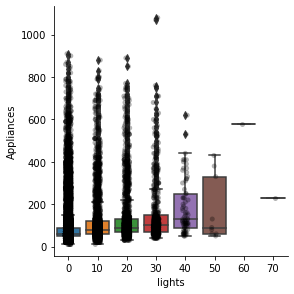

In [30]:
for var in discrete_vars:
    sns.catplot(x= var, y='Appliances', data=data, kind="box", height=4)
    sns.stripplot(x= var, y='Appliances', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

### Variables continuas

In [31]:
cont_vars = [var for var in num_vars if var not in discrete_vars + year_vars ]
cont_vars

['Appliances',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

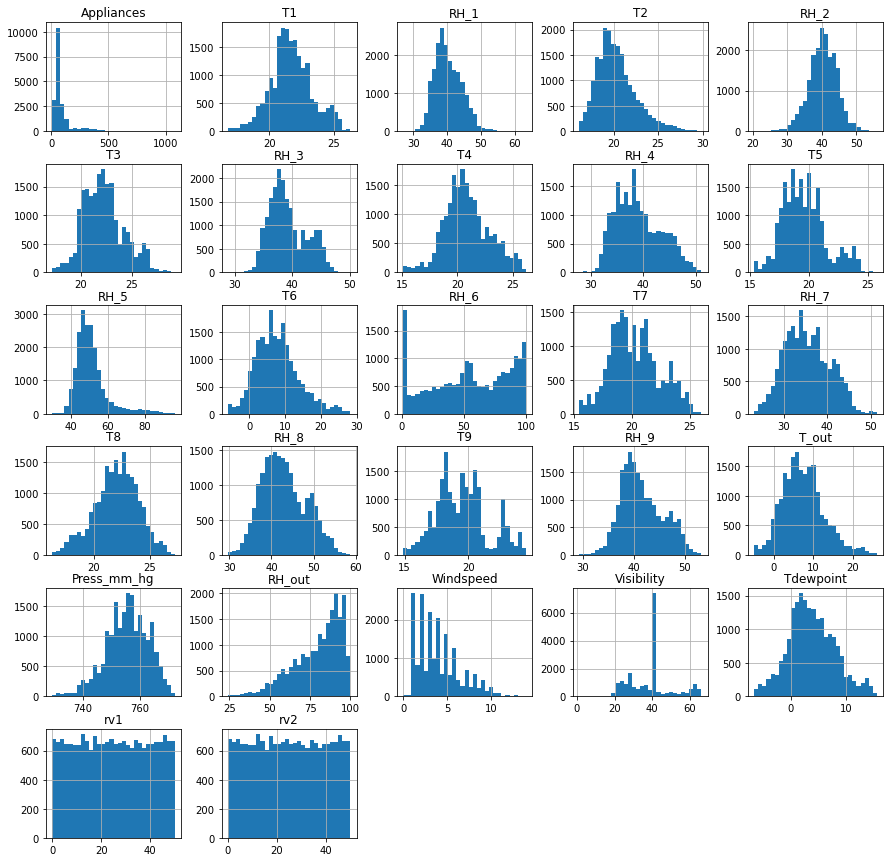

In [32]:
data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

In [ ]:
sesgadas = ['ScreenPorch', 'MiscVal', 'EnclosedPorch', '3SsnPorch', 'LowQualFinSF', 'BsmtFinSF2']